In [1]:
pip install opencv-python numpy matplotlib


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Load images
query_img_color = cv2.imread('image1.jpeg')           # The image to search in
train_img_color = cv2.imread('image2.jpeg')           # The image to search for

# Check if images loaded successfully
if query_img_color is None or train_img_color is None:
    print("Error: Could not load images")
    exit()

# Convert to grayscale
query_img = cv2.cvtColor(query_img_color, cv2.COLOR_BGR2GRAY)
train_img = cv2.cvtColor(train_img_color, cv2.COLOR_BGR2GRAY)

# Display image dimensions
print(f"Query image shape: {query_img.shape}")
print(f"Train image shape: {train_img.shape}")


Query image shape: (2048, 1536)
Train image shape: (2048, 1536)


In [4]:
orb = cv2.ORB_create(
    nfeatures=2000,           # Maximum features to retain (default: 500)
    scaleFactor=1.2,          # Pyramid scale factor (default: 1.2)
    nlevels=8,                # Number of pyramid levels (default: 8)
    edgeThreshold=31,         # Border size where features aren't detected
    firstLevel=0,             # Pyramid level to start from
    WTA_K=2,                  # Number of points for BRIEF descriptor (default: 2)
    scoreType=cv2.ORB_HARRIS_SCORE,  # HARRIS_SCORE or FAST_SCORE
    patchSize=31,             # Size of patch used for descriptor
    fastThreshold=20          # FAST detector threshold
)


In [5]:
# Detect keypoints and compute descriptors for both images
kp_query, des_query = orb.detectAndCompute(query_img, None)
kp_train, des_train = orb.detectAndCompute(train_img, None)

# Print statistics
print(f"Query image: {len(kp_query)} keypoints detected")
print(f"Train image: {len(kp_train)} keypoints detected")

# Examine a keypoint structure
if kp_query:
    kp = kp_query[0]
    print(f"\nKeypoint attributes:")
    print(f"  Position: ({kp.pt[0]:.2f}, {kp.pt[1]:.2f})")
    print(f"  Size: {kp.size}")
    print(f"  Angle: {kp.angle}°")
    print(f"  Response: {kp.response}")

# Check descriptor properties
print(f"\nDescriptor properties:")
print(f"  Shape: {des_query.shape}")
print(f"  Data type: {des_query.dtype}")
print(f"  Each descriptor: 32 bytes (256 bits)")


Query image: 2000 keypoints detected
Train image: 2000 keypoints detected

Keypoint attributes:
  Position: (1085.00, 1640.00)
  Size: 31.0
  Angle: 226.72262573242188°
  Response: 0.001958003267645836

Descriptor properties:
  Shape: (2000, 32)
  Data type: uint8
  Each descriptor: 32 bytes (256 bits)


In [6]:
# Method A: Brute-Force Matcher with cross-check (Simple, Good Quality)
# crossCheck=True ensures bidirectional matching (only best mutual matches)
bf_matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Method B: Brute-Force Matcher without cross-check (More Matches, Noisier)
# bf_matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

# Method C: FLANN-based Matcher (Faster for Large Datasets)
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=12, key_size=20, multi_probe_level=2)
search_params = dict(checks=50)
# flann_matcher = cv2.FlannBasedMatcher(index_params, search_params)


In [7]:
# Simple matching with cross-check (RECOMMENDED FOR BEGINNERS)
matches = bf_matcher.match(des_query, des_train)

# If not using cross-check, apply sorting
matches = sorted(matches, key=lambda x: x.distance)

# Print match statistics
print(f"Total matches found: {len(matches)}")
if matches:
    distances = [m.distance for m in matches]
    print(f"  Best match distance: {min(distances)}")
    print(f"  Worst match distance: {max(distances)}")
    print(f"  Average distance: {np.mean(distances):.2f}")
    print(f"  Std deviation: {np.std(distances):.2f}")

# Inspect first few matches
print("\nFirst 5 matches:")
for i, match in enumerate(matches[:5]):
    print(f"  Match {i}: query_idx={match.queryIdx}, train_idx={match.trainIdx}, distance={match.distance}")


Total matches found: 642
  Best match distance: 20.0
  Worst match distance: 77.0
  Average distance: 44.43
  Std deviation: 10.30

First 5 matches:
  Match 0: query_idx=885, train_idx=959, distance=20.0
  Match 1: query_idx=1313, train_idx=1457, distance=21.0
  Match 2: query_idx=1798, train_idx=1870, distance=22.0
  Match 3: query_idx=843, train_idx=1142, distance=23.0
  Match 4: query_idx=865, train_idx=1078, distance=23.0


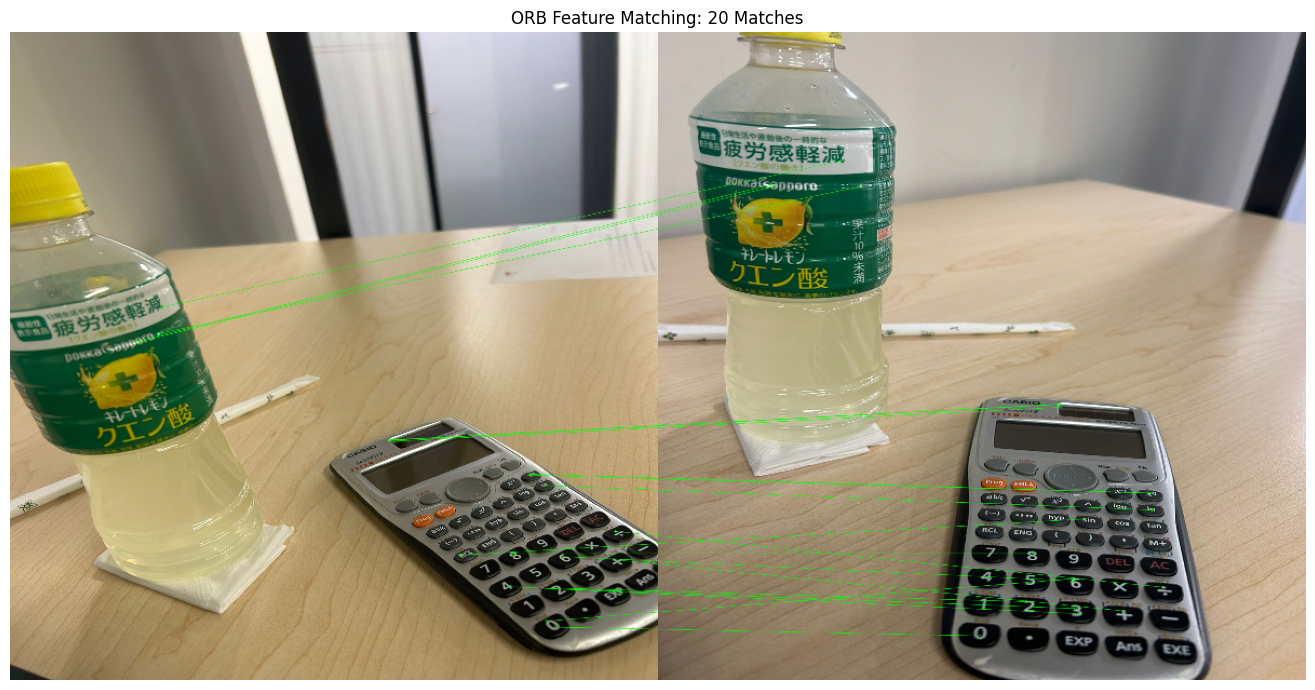

In [8]:
# Draw top N matches
num_matches_to_draw = min(20, len(matches))
result_img = cv2.drawMatches(
    query_img_color,              # First image (color)
    kp_query,                     # Keypoints from first image
    train_img_color,              # Second image (color)
    kp_train,                     # Keypoints from second image
    matches[:num_matches_to_draw],  # Matches to draw
    None,                         # Output array (None = create new)
    matchColor=(0, 255, 0),       # Green for matches
    singlePointColor=(255, 0, 0), # Red for unmatched points
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Resize for better visibility
result_img = cv2.resize(result_img, (1200, 600))

# Display using Matplotlib
plt.figure(figsize=(14, 7))
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.title(f'ORB Feature Matching: {num_matches_to_draw} Matches')
plt.axis('off')
plt.tight_layout()
plt.show()



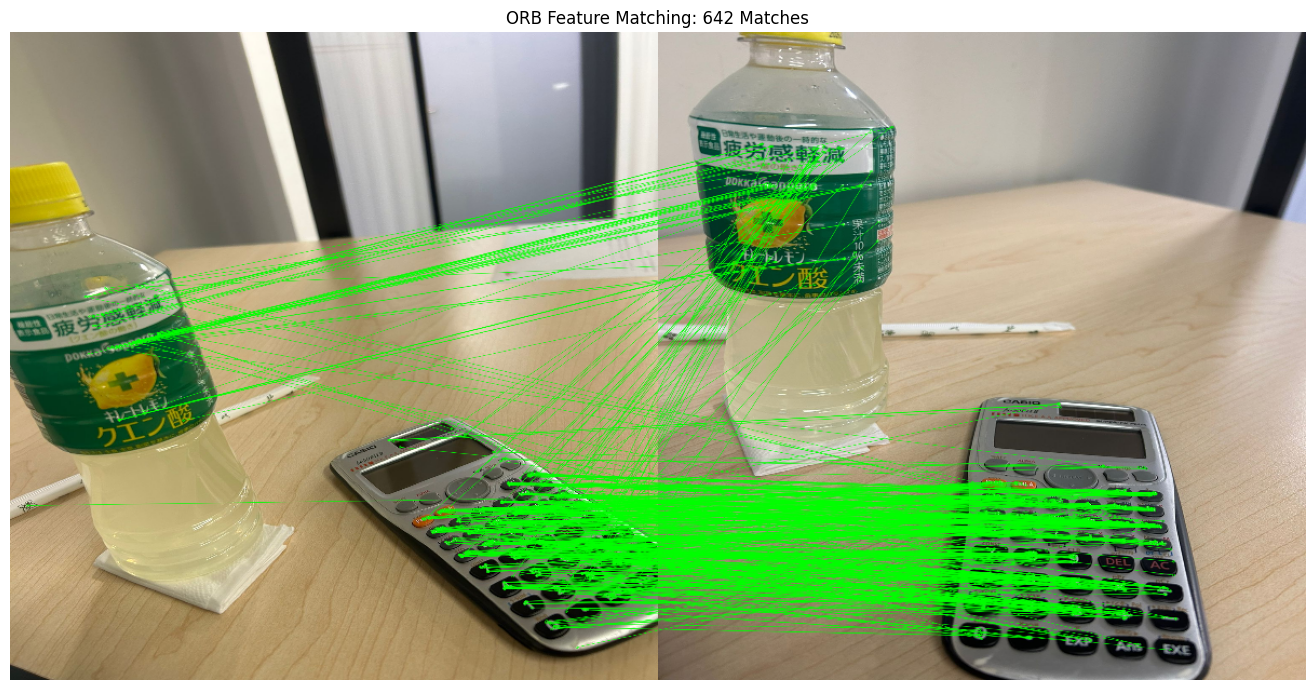

In [10]:
# Draw top N matches
num_matches_to_draw = min(1000, len(matches))
result_img = cv2.drawMatches(
    query_img_color,              # First image (color)
    kp_query,                     # Keypoints from first image
    train_img_color,              # Second image (color)
    kp_train,                     # Keypoints from second image
    matches[:num_matches_to_draw],  # Matches to draw
    None,                         # Output array (None = create new)
    matchColor=(0, 255, 0),       # Green for matches
    singlePointColor=(255, 0, 0), # Red for unmatched points
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Resize for better visibility
result_img = cv2.resize(result_img, (1200, 600))

# Display using Matplotlib
plt.figure(figsize=(14, 7))
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.title(f'ORB Feature Matching: {num_matches_to_draw} Matches')
plt.axis('off')
plt.tight_layout()
plt.show()